# Notebook for data collection and pre processing


#### First collecting the US cities

- The data is collected from simplemaps (https://simplemaps.com/data/world-cities) which provides data for all the cities in the world.

- The data is then filtered to get only the US cities.

In [1]:
import pandas as pd
import numpy as np

data = "/Users/alexandreribeiro/Downloads/simplemaps_worldcities_basicv1.77/worldcities.csv"

df = pd.read_csv(data)

df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
47863,Munha-dong,Munha-dong,39.3813,127.2517,"Korea, North",KP,PRK,Kangwŏn,NaN,NaN,1408979215
47864,Sil-li,Sil-li,39.4880,125.4640,"Korea, North",KP,PRK,P’yŏngnam,NaN,NaN,1408767958
47865,Muan,Muan,34.9897,126.4714,"Korea, South",KR,KOR,Jeonnam,admin,NaN,1410001061
47866,Hongseong,Hongseong,36.6009,126.6650,"Korea, South",KR,KOR,Chungnam,admin,NaN,1410822139


In [2]:
# Focus on entries with on the country United States

df_usa = df[df['country'] == 'United States']

df_usa

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
11,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,18908608.0,1840034016
33,Los Angeles,Los Angeles,34.1141,-118.4068,United States,US,USA,California,NaN,11922389.0,1840020491
55,Chicago,Chicago,41.8375,-87.6866,United States,US,USA,Illinois,NaN,8497759.0,1840000494
88,Miami,Miami,25.7840,-80.2101,United States,US,USA,Florida,NaN,6080145.0,1840015149
90,Houston,Houston,29.7860,-95.3885,United States,US,USA,Texas,NaN,5970127.0,1840020925
...,...,...,...,...,...,...,...,...,...,...,...
46360,Whitehouse,Whitehouse,32.2222,-95.2210,United States,US,USA,Texas,NaN,8512.0,1840022077
46378,Altoona,Altoona,44.8029,-91.4385,United States,US,USA,Wisconsin,NaN,8506.0,1840002295
46379,Old Forge,Old Forge,41.3704,-75.7409,United States,US,USA,Pennsylvania,NaN,8506.0,1840003387
46387,West Earl,West Earl,40.1260,-76.1774,United States,US,USA,Pennsylvania,NaN,8504.0,1840152739


In [3]:
# Checking missing values

df_usa.isnull().sum()

city             0
city_ascii       0
lat              0
lng              0
country          0
iso2             0
iso3             0
admin_name       0
capital       5273
population       0
id               0
dtype: int64

In [4]:
# check dupplicates

df_usa.duplicated().sum()

0

In [5]:
# drop columns

df_usa.drop(columns=['city_ascii', 'iso2', 'iso3', 'capital', 'id'], inplace=True)

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_68741/2447420531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa.drop(columns=['city_ascii', 'iso2', 'iso3', 'capital', 'id'], inplace=True)


In [6]:
df_usa

,city,lat,lng,country,admin_name,population
11,New York,40.6943,-73.9249,United States,New York,18908608.0
33,Los Angeles,34.1141,-118.4068,United States,California,11922389.0
55,Chicago,41.8375,-87.6866,United States,Illinois,8497759.0
88,Miami,25.7840,-80.2101,United States,Florida,6080145.0
90,Houston,29.7860,-95.3885,United States,Texas,5970127.0
...,...,...,...,...,...,...
46360,Whitehouse,32.2222,-95.2210,United States,Texas,8512.0
46378,Altoona,44.8029,-91.4385,United States,Wisconsin,8506.0
46379,Old Forge,41.3704,-75.7409,United States,Pennsylvania,8506.0
46387,West Earl,40.1260,-76.1774,United States,Pennsylvania,8504.0


In [7]:
# export to csv

df_usa.to_csv('usa_cities.csv', index=False)

In [8]:
# using just city and lat and lng to make a new dataframe

df_gee = df_usa[['city', 'lat', 'lng']]

In [9]:
df_gee

,city,lat,lng
11,New York,40.6943,-73.9249
33,Los Angeles,34.1141,-118.4068
55,Chicago,41.8375,-87.6866
88,Miami,25.7840,-80.2101
90,Houston,29.7860,-95.3885
...,...,...,...
46360,Whitehouse,32.2222,-95.2210
46378,Altoona,44.8029,-91.4385
46379,Old Forge,41.3704,-75.7409
46387,West Earl,40.1260,-76.1774


In [10]:
# export to csv

df_gee.to_csv('usa_cities_gee.csv', index=False)

### Importing datasets obtained from Google Earth Engine

- The datasets were obtained from Google Earth Engine through 5 batches of 1000 cities each.

- These datasets contain the greenspaces area inside the city limits.

In [11]:
# Load the datasets from the uploaded files

batch_0 = pd.read_csv('/Users/alexandreribeiro/Desktop/us_cities/drive-download-20240815T084459Z-001/GreenSpaceAreas_Batch_0.csv')
batch_1000 = pd.read_csv('/Users/alexandreribeiro/Desktop/us_cities/drive-download-20240815T084459Z-001/GreenSpaceAreas_Batch_1000.csv')
batch_2000 = pd.read_csv('/Users/alexandreribeiro/Desktop/us_cities/drive-download-20240815T084459Z-001/GreenSpaceAreas_Batch_2000.csv')
batch_3000 = pd.read_csv('/Users/alexandreribeiro/Desktop/us_cities/drive-download-20240815T084459Z-001/GreenSpaceAreas_Batch_3000.csv')
batch_4000 = pd.read_csv('/Users/alexandreribeiro/Desktop/us_cities/drive-download-20240815T084459Z-001/GreenSpaceAreas_Batch_4000.csv')

# Combine the datasets into one dataframe

combined_data_new = pd.concat([batch_0, batch_1000, batch_2000, batch_3000, batch_4000])

# Check for null values in the combined new dataset

null_values_new = combined_data_new.isnull().sum()
print(null_values_new)


system:index         0
city                 0
greenSpaceArea_m2    0
.geo                 0
dtype: int64


#### Merging the Combined Data with the Original Population Data:

In [12]:
# Merge the original dataset with the combined green space data using both 'city' and 'admin_name' to ensure correct matching

merged_data_corrected = df_usa.merge(combined_data_new[['city', 'greenSpaceArea_m2']], on='city', how='inner')

# Remove potential duplicates by keeping the first occurrence

merged_data_corrected = merged_data_corrected.drop_duplicates(subset=['city', 'admin_name'])

# Display basic information about the merged dataset and the first few rows

merged_data_corrected.sample(5)

,city,lat,lng,country,admin_name,population,greenSpaceArea_m2
1181,Alexandria,31.2923,-92.4702,United States,Louisiana,77109.0,1.062787e+08
4757,Takoma Park,38.9810,-77.0028,United States,Maryland,17542.0,8.396193e+07
7482,Corte Madera,37.9238,-122.5128,United States,California,10155.0,1.125022e+08
5970,Bonita,32.6651,-117.0296,United States,California,13473.0,1.231394e+07
493,Cary,35.7819,-78.8195,United States,North Carolina,174880.0,2.208906e+08


In [13]:
#Convert the 'greenSpaceArea_m2' column to km2, with 2 decimal digits

merged_data_corrected['greenSpaceArea_km2'] = (merged_data_corrected['greenSpaceArea_m2'] / 1000000).round(2)



In [14]:
usa_df = merged_data_corrected.copy()

# Checking how many cities have green space area = 0

usa_df[usa_df['greenSpaceArea_km2'] == 0].shape

# Drop rows with green space area = 0

usa_df = usa_df[usa_df['greenSpaceArea_km2'] != 0]

#### Checking for cities that overlap

- Eliminate cities that are less 5 km apart from each other, in order to maintain accuracy of the greenspace area.

In [15]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

# Function to calculate the Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    
    a = np.sin(delta_phi / 2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return R * c

# Calculate pairwise distances between all cities
def calculate_distances(df):
    coords = df[['lat', 'lng']].values
    dist_matrix = pdist(coords, metric=lambda u, v: haversine(u[0], u[1], v[0], v[1]))
    dist_matrix_square = squareform(dist_matrix)
    return pd.DataFrame(dist_matrix_square, index=df['city'], columns=df['city'])

# Calculate the distance matrix for the merged dataset
distance_matrix = calculate_distances(usa_df)

# Identify city pairs that are within a certain distance threshold (e.g., 10 km)
threshold_distance = 10  # in kilometers
close_cities = (distance_matrix < threshold_distance) & (distance_matrix > 0)

# Extract the close city pairs manually
close_cities_pairs = close_cities.stack()

# Manually create a DataFrame without reset_index
close_cities_pairs_df = pd.DataFrame({
    'City1': close_cities_pairs.index.get_level_values(0),
    'City2': close_cities_pairs.index.get_level_values(1),
    'IsClose': close_cities_pairs.values
})

# Filter out rows where cities are the same
close_cities_pairs_df = close_cities_pairs_df[close_cities_pairs_df['City1'] != close_cities_pairs_df['City2']]

# Keep only the close city pairs
close_cities_pairs_df = close_cities_pairs_df[close_cities_pairs_df['IsClose']]

# Remove duplicates where the same pair appears twice (e.g., City1-City2 and City2-City1)
close_cities_pairs_df['sorted_pair'] = close_cities_pairs_df.apply(lambda x: tuple(sorted((x['City1'], x['City2']))), axis=1)
close_cities_pairs_df = close_cities_pairs_df.drop_duplicates(subset=['sorted_pair']).drop(columns=['sorted_pair', 'IsClose'])

# Display the result
close_cities_pairs_df.sample(5)


,City1,City2
9618898,Biddeford,Saco
706322,Reading,Cumru
5559560,Monrovia,Vincent
8699420,Lutz,Cheval
9572305,East Peoria,Washington


In [16]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

# Function to calculate the Haversine distance

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    
    a = np.sin(delta_phi / 2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return R * c

# Calculate pairwise distances between all cities

def calculate_distances(df):
    coords = df[['lat', 'lng']].values
    dist_matrix = pdist(coords, metric=lambda u, v: haversine(u[0], u[1], v[0], v[1]))
    dist_matrix_square = squareform(dist_matrix)
    return pd.DataFrame(dist_matrix_square, index=df['city'], columns=df['city'])

# Calculate the distance matrix for the dataset

distance_matrix = calculate_distances(usa_df)

# Identify cities that have no other city within a 10 km radius

threshold_distance = 5  # in kilometers
isolation_matrix = (distance_matrix > threshold_distance) | (distance_matrix == 0)

# Identify isolated cities

isolated_cities = isolation_matrix.all(axis=1)

# Filter out the isolated cities

isolated_cities_df = usa_df[usa_df['city'].isin(isolated_cities[isolated_cities].index)]

# Display the isolated cities

print(isolated_cities_df.shape)
isolated_cities_df.head()


(3361, 8)


,city,lat,lng,country,admin_name,population,greenSpaceArea_m2,greenSpaceArea_km2
0,New York,40.6943,-73.9249,United States,New York,18908608.0,9.581344e+06,9.58
2,Chicago,41.8375,-87.6866,United States,Illinois,8497759.0,2.852291e+05,0.29
3,Miami,25.7840,-80.2101,United States,Florida,6080145.0,3.557280e+07,35.57
5,Houston,29.7860,-95.3885,United States,Texas,5970127.0,5.257163e+07,52.57
6,Dallas,32.7935,-96.7667,United States,Texas,5830932.0,7.990937e+07,79.91


In [17]:
isolated_cities_df.describe()

,lat,lng,population,greenSpaceArea_m2,greenSpaceArea_km2
count,3361.000000,3361.000000,3.361000e+03,3.361000e+03,3361.000000
mean,37.656702,-91.287030,8.555003e+04,9.931718e+07,99.317132
std,5.029581,16.065129,4.839004e+05,9.098885e+07,90.988763
min,19.582800,-159.356400,8.506000e+03,5.180484e+03,0.010000
25%,33.884100,-97.776900,1.235600e+04,1.709698e+07,17.100000
50%,38.791600,-87.022900,1.934900e+04,7.455334e+07,74.550000
75%,41.434900,-79.820300,4.084200e+04,1.646949e+08,164.690000
max,48.950200,-68.716600,1.890861e+07,3.655815e+08,365.580000


In [18]:
# Drop rows with green space area = 0

drop_rows = isolated_cities_df[isolated_cities_df['greenSpaceArea_km2'] == 0].shape

# Drop colum greenspace area m2

isolated_cities_df.drop(columns=['greenSpaceArea_m2'], inplace=True)

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_68741/2333283045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isolated_cities_df.drop(columns=['greenSpaceArea_m2'], inplace=True)


In [19]:
# Drop rows where the green space area is 0

isolated_cities_df = isolated_cities_df[isolated_cities_df['greenSpaceArea_km2'] != 0]

isolated_cities_df

,city,lat,lng,country,admin_name,population,greenSpaceArea_km2
0,New York,40.6943,-73.9249,United States,New York,18908608.0,9.58
2,Chicago,41.8375,-87.6866,United States,Illinois,8497759.0,0.29
3,Miami,25.7840,-80.2101,United States,Florida,6080145.0,35.57
5,Houston,29.7860,-95.3885,United States,Texas,5970127.0,52.57
6,Dallas,32.7935,-96.7667,United States,Texas,5830932.0,79.91
...,...,...,...,...,...,...,...
8544,Delavan,42.6282,-88.6323,United States,Wisconsin,8519.0,17.37
8545,Evergreen,48.2308,-114.2700,United States,Montana,8514.0,0.96
8547,Sutherlin,43.3882,-123.3242,United States,Oregon,8513.0,54.94
8549,Altoona,44.8029,-91.4385,United States,Wisconsin,8506.0,0.27


In [20]:
isolated_cities_df.admin_name.nunique()

49

In [21]:
# Group table by admin_name and sum the green space area and ranking by the highest green space area

isolated_cities_df_grouped = isolated_cities_df.groupby('admin_name').agg({'greenSpaceArea_km2': 'sum'}).sort_values(by='greenSpaceArea_km2', ascending=False)

isolated_cities_df_grouped

,greenSpaceArea_km2
admin_name,
Florida,29874.81
California,20849.79
North Carolina,19473.58
Georgia,18281.77
Alabama,18168.99
Texas,17742.13
Tennessee,14013.31
New Jersey,13566.39
Massachusetts,13451.14


In [22]:
# How many cities do we have per admin_name

isolated_cities_df_grouped['city_count'] = isolated_cities_df['admin_name'].value_counts()

isolated_cities_df_grouped

,greenSpaceArea_km2,city_count
admin_name,,
Florida,29874.81,209
California,20849.79,314
North Carolina,19473.58,91
Georgia,18281.77,101
Alabama,18168.99,78
Texas,17742.13,251
Tennessee,14013.31,72
New Jersey,13566.39,112
Massachusetts,13451.14,148


## Loading the Public Health Indicators datasets

- The datasets were obtained from CDC (Centers for Disease Control and Prevention) and contain information about the public health indicators for each state in the United States (https://cdi.cdc.gov/?location=ALL&category=TOB&indicators=TOB04).

#### Obesity

- The dataset contains information about the percentage of adults who are obese in each state in the United States.

- https://www.cdc.gov/obesity/php/data-research/adult-obesity-prevalence-maps.html

In [23]:
# importing obesity data

obesity_data = pd.read_csv('/Users/alexandreribeiro/Desktop/us_cities/obesity-rate-US.csv')

In [24]:
# Changing the column name Prevalence to obesity_rate and state to lower_case

obesity_data.rename(columns={'Prevalence': 'obesity_rate', 'State': 'state'}, inplace=True)

# Drop the column '95% CI'

obesity_data.drop(columns=['95% CI'], inplace=True)

obesity_data.head()

,state,obesity_rate
0,Alabama,38.3
1,Alaska,32.1
2,Arizona,33.2
3,Arkansas,37.4
4,California,28.1


#### Smoking

- The datasets contain information about the percentage of adults who are obese.

- https://cdi.cdc.gov/?location=ALL&category=TOB&indicators=TOB04

In [25]:
# importing smoking data

smoking_data = pd.read_csv('/Users/alexandreribeiro/Desktop/us_cities/smoking-rates-us.csv')

In [26]:
# Maintaing only LocationDesc and DataValueDisplay columns

smoking_data = smoking_data[['LocationDesc', 'DataValueDisplay']]

# Changing column names "LocationDesc" to "state" and "DataValueDisplay" to "smoking_rate"

smoking_data.rename(columns={'LocationDesc': 'state', 'DataValueDisplay': 'smoking_rate'}, inplace=True)

smoking_data.head()

,state,smoking_rate
0,United States,13.2
1,Alabama,16.2
2,Alaska,16.2
3,Arizona,13.1
4,Arkansas,19.9


#### Physical Activity

- Adults that follow the CDC's guidelines for physical activity, like at least 150 minutes of moderate-intensity physical activity a week, such as 30 minutes a day, 5 days a week.

- https://cdi.cdc.gov/?location=ALL&category=NPAW&indicators=NPW09

In [27]:
# Importing Exercising data

exercising_data = pd.read_csv('/Users/alexandreribeiro/Desktop/us_cities/phisical-exercise-us.csv')

In [28]:
# Maintaing only LocationDesc and DataValueDisplay columns

exercising_data = exercising_data[['LocationDesc', 'DataValueDisplay']]

# Changing column names "LocationDesc" to "state" and "DataValueDisplay" to "exercising_rate"

exercising_data.rename(columns={'LocationDesc': 'state', 'DataValueDisplay': 'exercising_rate'}, inplace=True)

exercising_data.head()


,state,exercising_rate
0,United States,51.1
1,Alabama,45.9
2,Alaska,57.4
3,Arizona,54.0
4,Arkansas,46.8


#### Chronic Diseases

- The datasets contain information about the percentage of adults who have been diagnosed with 2 or more chronic diseases.

- https://cdi.cdc.gov/?location=ALL&category=HEA&indicators=HEA05

In [29]:
# importing Chronic Disease data

chronic_data = pd.read_csv('/Users/alexandreribeiro/Desktop/us_cities/chronic-diseases-us.csv')

chronic_data.head()

,LocationAbbr,LocationDesc,LocationID,TopicID,DataSource,DataSourceUrl,Question,QuestionID,StratificationCategoryId,StratificationCategory,...,HighConfidenceLimit,DataValueDisplay,LowConfidenceLimitDisplay,HighConfidenceLimitDisplay,DataValueUnit,DataValueType,DataValueTypeID,DataValueFootnote,DataValueFootnoteSymbol,DisplayOrder
0,US,United States,59,HEA,BRFSS,https://www.cdc.gov/brfss,2 or more chronic conditions among adults,HEA05,OVERALL,Overall,...,17.3,17.0,16.8,17.3,%,Age-adjusted Prevalence,AGEADJPREV,NaN,NaN,4
1,AL,Alabama,1,HEA,BRFSS,https://www.cdc.gov/brfss,2 or more chronic conditions among adults,HEA05,OVERALL,Overall,...,23.9,22.5,21.1,23.9,%,Age-adjusted Prevalence,AGEADJPREV,NaN,NaN,4
2,AK,Alaska,2,HEA,BRFSS,https://www.cdc.gov/brfss,2 or more chronic conditions among adults,HEA05,OVERALL,Overall,...,16.2,15.1,14.1,16.2,%,Age-adjusted Prevalence,AGEADJPREV,NaN,NaN,4
3,AZ,Arizona,4,HEA,BRFSS,https://www.cdc.gov/brfss,2 or more chronic conditions among adults,HEA05,OVERALL,Overall,...,17.9,16.8,15.8,17.9,%,Age-adjusted Prevalence,AGEADJPREV,NaN,NaN,4
4,AR,Arkansas,5,HEA,BRFSS,https://www.cdc.gov/brfss,2 or more chronic conditions among adults,HEA05,OVERALL,Overall,...,23.7,22.4,21.1,23.7,%,Age-adjusted Prevalence,AGEADJPREV,NaN,NaN,4


In [30]:
# Maintaing only LocationDesc and DataValueDisplay columns

chronic_data = chronic_data[['LocationDesc', 'DataValueDisplay']]

# Changing column names "LocationDesc" to "state" and "DataValueDisplay" to "chronic_rate"

chronic_data.rename(columns={'LocationDesc': 'state', 'DataValueDisplay': 'chronic_rate'}, inplace=True)

chronic_data.head()

,state,chronic_rate
0,United States,17.0
1,Alabama,22.5
2,Alaska,15.1
3,Arizona,16.8
4,Arkansas,22.4


#### Life Expectancy

- The datasets contain information about the life expectancy in each state in the United States.

- https://cdi.cdc.gov/?location=ALL&category=HEA&indicators=HEA06

In [31]:
# importing life expectancy data

life_expectancy_data = pd.read_csv('/Users/alexandreribeiro/Desktop/us_cities/life-expectancy-us.csv')

In [32]:
# Maintaing only LocationDesc and DataValueDisplay columns

life_expectancy_data = life_expectancy_data[['LocationDesc', 'DataValueDisplay']]

# Changing column names "LocationDesc" to "state" and "DataValueDisplay" to "life_expectancy"

life_expectancy_data.rename(columns={'LocationDesc': 'state', 'DataValueDisplay': 'life_expectancy'}, inplace=True)

life_expectancy_data.head()

,state,life_expectancy
0,United States,77.0
1,Alabama,73.2
2,Alaska,76.6
3,Arizona,76.3
4,Arkansas,73.8


#### Chronic obstructive pulmonary disease (COPD)

In [33]:
# importing copd data

copd_data = pd.read_csv('/Users/alexandreribeiro/Downloads/copd-us.csv')

In [34]:
# maintaing only LocationDesc and DataValueDisplay columns

copd_data = copd_data[['LocationDesc', 'DataValueDisplay']]

# Changing column names "LocationDesc" to "state" and "DataValueDisplay" to "copd_rate"

copd_data.rename(columns={'LocationDesc': 'state', 'DataValueDisplay': 'copd_rate'}, inplace=True)

copd_data.head()

,state,copd_rate
0,United States,6.1
1,Alabama,8.3
2,Alaska,5.4
3,Arizona,5.9
4,Arkansas,8.9


#### Depression rates

In [35]:
# importing depression data

depression_data = pd.read_csv('/Users/alexandreribeiro/Downloads/depression-us.csv')

In [36]:
# maintaing only LocationDesc and DataValueDisplay columns

depression_data = depression_data[['LocationDesc', 'DataValueDisplay']]

# Changing column names "LocationDesc" to "state" and "DataValueDisplay" to "depression_rate"

depression_data.rename(columns={'LocationDesc': 'state', 'DataValueDisplay': 'depression_rate'}, inplace=True)

depression_data.head()

,state,depression_rate
0,United States,21.1
1,Alabama,24.6
2,Alaska,20.4
3,Arizona,20.6
4,Arkansas,27.6


##### Merge the main dataset with the public health indicators datasets

In [37]:
# df_usa lower case columns and change admin_name to state

isolated_cities_df.columns = isolated_cities_df.columns.str.lower()

isolated_cities_df.rename(columns={'admin_name': 'state'}, inplace=True)

isolated_cities_df

,city,lat,lng,country,state,population,greenspacearea_km2
0,New York,40.6943,-73.9249,United States,New York,18908608.0,9.58
2,Chicago,41.8375,-87.6866,United States,Illinois,8497759.0,0.29
3,Miami,25.7840,-80.2101,United States,Florida,6080145.0,35.57
5,Houston,29.7860,-95.3885,United States,Texas,5970127.0,52.57
6,Dallas,32.7935,-96.7667,United States,Texas,5830932.0,79.91
...,...,...,...,...,...,...,...
8544,Delavan,42.6282,-88.6323,United States,Wisconsin,8519.0,17.37
8545,Evergreen,48.2308,-114.2700,United States,Montana,8514.0,0.96
8547,Sutherlin,43.3882,-123.3242,United States,Oregon,8513.0,54.94
8549,Altoona,44.8029,-91.4385,United States,Wisconsin,8506.0,0.27


In [38]:
# Adding the 5 datasets to the isolated_cities_df

isolated_cities_df = isolated_cities_df.merge(obesity_data, on='state', how='left')
isolated_cities_df = isolated_cities_df.merge(smoking_data, on='state', how='left')
isolated_cities_df = isolated_cities_df.merge(exercising_data, on='state', how='left')
isolated_cities_df = isolated_cities_df.merge(chronic_data, on='state', how='left')
isolated_cities_df = isolated_cities_df.merge(life_expectancy_data, on='state', how='left')
isolated_cities_df = isolated_cities_df.merge(copd_data, on='state', how='left')
isolated_cities_df = isolated_cities_df.merge(depression_data, on='state', how='left')


isolated_cities_df

,city,lat,lng,country,state,population,greenspacearea_km2,obesity_rate,smoking_rate,exercising_rate,chronic_rate,life_expectancy,copd_rate,depression_rate
0,New York,40.6943,-73.9249,United States,New York,18908608.0,9.58,30.1,11.5,50.7,15.7,77.7,4.6,18.1
1,Chicago,41.8375,-87.6866,United States,Illinois,8497759.0,0.29,33.4,12.8,50.0,15.6,76.8,5.2,18.0
2,Miami,25.7840,-80.2101,United States,Florida,6080145.0,35.57,31.6,12.0,54.3,16.5,77.5,6.2,18.3
3,Houston,29.7860,-95.3885,United States,Texas,5970127.0,52.57,35.5,12.0,49.4,16.6,76.5,5.6,19.4
4,Dallas,32.7935,-96.7667,United States,Texas,5830932.0,79.91,35.5,12.0,49.4,16.6,76.5,5.6,19.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,Delavan,42.6282,-88.6323,United States,Wisconsin,8519.0,17.37,37.7,15.0,55.0,17.0,77.7,5.8,24.2
3357,Evergreen,48.2308,-114.2700,United States,Montana,8514.0,0.96,30.5,16.0,63.2,16.4,76.8,5.7,25.8
3358,Sutherlin,43.3882,-123.3242,United States,Oregon,8513.0,54.94,30.9,12.8,56.8,17.4,78.8,5.8,24.8
3359,Altoona,44.8029,-91.4385,United States,Wisconsin,8506.0,0.27,37.7,15.0,55.0,17.0,77.7,5.8,24.2


In [39]:
# replace exercising rate missing values with the mean

isolated_cities_df['exercising_rate'] = isolated_cities_df['exercising_rate'].fillna(isolated_cities_df['exercising_rate'].mean())

# export to csv

isolated_cities_df.to_csv('isolated_cities_df.csv', index=False)

In [40]:
isolated_cities_df.shape

(3361, 14)

In [41]:
isolated_cities_df.dtypes

city                   object
lat                   float64
lng                   float64
country                object
state                  object
population            float64
greenspacearea_km2    float64
obesity_rate          float64
smoking_rate          float64
exercising_rate       float64
chronic_rate          float64
life_expectancy       float64
copd_rate             float64
depression_rate       float64
dtype: object

In [42]:
# importing state population to incorporate in the analysis

state_population = pd.read_csv('/Users/alexandreribeiro/Documents/GitHub/final_project/data/raw/state_population.csv')

# lower columns name

state_population.columns = state_population.columns.str.lower()

In [43]:
# merging isolated_cities_df with state_population on state with a new column called state_population

merged_final_df = isolated_cities_df.merge(state_population, on='state', how='left')

In [44]:
# changing District of Columbia to Washington on the state column

merged_final_df['state'] = merged_final_df['state'].replace('District of Columbia', 'Washington')

# Swap the values between population_x (city) and population_y (state) for row 4

merged_final_df.loc[4, ['population_x', 'population_y']] = merged_final_df.loc[4, ['population_y', 'population_x']].values

In [45]:
merged_final_df

,city,lat,lng,country,state,population_x,greenspacearea_km2,obesity_rate,smoking_rate,exercising_rate,chronic_rate,life_expectancy,copd_rate,depression_rate,population_y
0,New York,40.6943,-73.9249,United States,New York,18908608.0,9.58,30.1,11.5,50.7,15.7,77.7,4.6,18.1,19571216
1,Chicago,41.8375,-87.6866,United States,Illinois,8497759.0,0.29,33.4,12.8,50.0,15.6,76.8,5.2,18.0,12549689
2,Miami,25.7840,-80.2101,United States,Florida,6080145.0,35.57,31.6,12.0,54.3,16.5,77.5,6.2,18.3,22610726
3,Houston,29.7860,-95.3885,United States,Texas,5970127.0,52.57,35.5,12.0,49.4,16.6,76.5,5.6,19.4,30503301
4,Dallas,32.7935,-96.7667,United States,Texas,30503301.0,79.91,35.5,12.0,49.4,16.6,76.5,5.6,19.4,5830932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,Delavan,42.6282,-88.6323,United States,Wisconsin,8519.0,17.37,37.7,15.0,55.0,17.0,77.7,5.8,24.2,5910955
3357,Evergreen,48.2308,-114.2700,United States,Montana,8514.0,0.96,30.5,16.0,63.2,16.4,76.8,5.7,25.8,1132812
3358,Sutherlin,43.3882,-123.3242,United States,Oregon,8513.0,54.94,30.9,12.8,56.8,17.4,78.8,5.8,24.8,4233358
3359,Altoona,44.8029,-91.4385,United States,Wisconsin,8506.0,0.27,37.7,15.0,55.0,17.0,77.7,5.8,24.2,5910955


In [46]:
# Function to switch the population values if the city population is greater than the state population

def switch_population_if_needed(df, city_col='population_x', state_col='population_y'):
    """
    This function checks if the population of a city is greater than the population of its state
    and switches them if necessary.
    
    Parameters:
    - df: DataFrame containing the population data.
    - city_col: Name of the column representing the city population.
    - state_col: Name of the column representing the state population.
    
    Returns:
    - The updated DataFrame with corrected population values.
    """
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Check if the city population is greater than the state population
        if row[city_col] > row[state_col]:
            # Switch the population values
            df.at[index, city_col], df.at[index, state_col] = row[state_col], row[city_col]
    
    return df

# Apply the function to your dataset

merged_final_df = switch_population_if_needed(merged_final_df, city_col='population_x', state_col='population_y')


In [47]:
# how many rows we have with population_x bigger than population_y

merged_final_df[merged_final_df['population_x'] > merged_final_df['population_y']].shape

(0, 15)

### Calculating the health factors to a city level


In [48]:
# Step 1: Calculate the population weight for each city

merged_final_df['population_weight'] = merged_final_df['population_x'] / merged_final_df['population_y']

# Step 2: Adjust the state-level metrics to estimate city-level metrics

merged_final_df['adjusted_obesity_rate'] = merged_final_df['obesity_rate'] * merged_final_df['population_weight']
merged_final_df['adjusted_smoking_rate'] = merged_final_df['smoking_rate'] * merged_final_df['population_weight']
merged_final_df['adjusted_exercising_rate'] = merged_final_df['exercising_rate'] * merged_final_df['population_weight']
merged_final_df['adjusted_chronic_rate'] = merged_final_df['chronic_rate'] * merged_final_df['population_weight']
merged_final_df['adjusted_life_expectancy'] = merged_final_df['life_expectancy'] * merged_final_df['population_weight']
merged_final_df['adjusted_copd_rate'] = merged_final_df['copd_rate'] * merged_final_df['population_weight']
merged_final_df['adjusted_depression_rate'] = merged_final_df['depression_rate'] * merged_final_df['population_weight']

# Step 3: (Optional) Clean up the dataset by dropping unnecessary columns

merged_final_df.drop(columns=['population_weight'], inplace=True)

# Step 4: Review the first few rows to ensure everything looks correct

print(merged_final_df[['city', 'state', 'adjusted_obesity_rate', 'adjusted_smoking_rate', 'adjusted_exercising_rate', 'adjusted_chronic_rate', 'adjusted_life_expectancy']].head())

# Save the adjusted dataset if needed

merged_final_df.to_csv('adjusted_city_level_metrics.csv', index=False)

       city     state  adjusted_obesity_rate  adjusted_smoking_rate  \
0  New York  New York              29.080927              11.110653   
1   Chicago  Illinois              22.616110               8.667252   
2     Miami   Florida               8.497409               3.226864   
3   Houston     Texas               6.948084               2.348648   
4    Dallas     Texas               6.786088               2.293889   

   adjusted_exercising_rate  adjusted_chronic_rate  adjusted_life_expectancy  
0                 48.983488              15.168457                 75.069369  
1                 33.856453              10.563213                 52.003511  
2                 14.601560               4.436938                 20.840164  
3                  9.668602               3.248963                 14.972632  
4                  9.443176               3.173213                 14.623542  


In [49]:
merged_final_df

,city,lat,lng,country,state,population_x,greenspacearea_km2,obesity_rate,smoking_rate,exercising_rate,...,copd_rate,depression_rate,population_y,adjusted_obesity_rate,adjusted_smoking_rate,adjusted_exercising_rate,adjusted_chronic_rate,adjusted_life_expectancy,adjusted_copd_rate,adjusted_depression_rate
0,New York,40.6943,-73.9249,United States,New York,18908608.0,9.58,30.1,11.5,50.7,...,4.6,18.1,19571216,29.080927,11.110653,48.983488,15.168457,75.069369,4.444261,17.487202
1,Chicago,41.8375,-87.6866,United States,Illinois,8497759.0,0.29,33.4,12.8,50.0,...,5.2,18.0,12549689,22.616110,8.667252,33.856453,10.563213,52.003511,3.521071,12.188323
2,Miami,25.7840,-80.2101,United States,Florida,6080145.0,35.57,31.6,12.0,54.3,...,6.2,18.3,22610726,8.497409,3.226864,14.601560,4.436938,20.840164,1.667213,4.920968
3,Houston,29.7860,-95.3885,United States,Texas,5970127.0,52.57,35.5,12.0,49.4,...,5.6,19.4,30503301,6.948084,2.348648,9.668602,3.248963,14.972632,1.096036,3.796981
4,Dallas,32.7935,-96.7667,United States,Texas,5830932.0,79.91,35.5,12.0,49.4,...,5.6,19.4,30503301,6.786088,2.293889,9.443176,3.173213,14.623542,1.070481,3.708454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,Delavan,42.6282,-88.6323,United States,Wisconsin,8519.0,17.37,37.7,15.0,55.0,...,5.8,24.2,5910955,0.054334,0.021618,0.079267,0.024501,0.111983,0.008359,0.034878
3357,Evergreen,48.2308,-114.2700,United States,Montana,8514.0,0.96,30.5,16.0,63.2,...,5.7,25.8,1132812,0.229232,0.120253,0.474999,0.123259,0.577214,0.042840,0.193908
3358,Sutherlin,43.3882,-123.3242,United States,Oregon,8513.0,54.94,30.9,12.8,56.8,...,5.8,24.8,4233358,0.062138,0.025740,0.114221,0.034990,0.158462,0.011663,0.049871
3359,Altoona,44.8029,-91.4385,United States,Wisconsin,8506.0,0.27,37.7,15.0,55.0,...,5.8,24.2,5910955,0.054251,0.021585,0.079146,0.024463,0.111812,0.008346,0.034824


In [50]:
# Organizing final dataset for analysis

# Rename population columns for clarity (optional)

merged_final_df.rename(columns={'population_x': 'population_city', 'population_y': 'population_state'}, inplace=True)

# Keep only the necessary columns

columns_to_keep = [
    'city', 'state', 'country', 'greenspacearea_km2', 'adjusted_obesity_rate',
    'adjusted_smoking_rate', 'adjusted_exercising_rate',
    'adjusted_chronic_rate', 'adjusted_life_expectancy',    
    'adjusted_copd_rate', 'adjusted_depression_rate',
    'population_city', 'population_state',
]

dataset = merged_final_df[columns_to_keep]

# Save the cleaned dataset

dataset.to_csv('cleaned_city_health_metrics.csv', index=False)

dataset

,city,state,country,greenspacearea_km2,adjusted_obesity_rate,adjusted_smoking_rate,adjusted_exercising_rate,adjusted_chronic_rate,adjusted_life_expectancy,adjusted_copd_rate,adjusted_depression_rate,population_city,population_state
0,New York,New York,United States,9.58,29.080927,11.110653,48.983488,15.168457,75.069369,4.444261,17.487202,18908608.0,19571216
1,Chicago,Illinois,United States,0.29,22.616110,8.667252,33.856453,10.563213,52.003511,3.521071,12.188323,8497759.0,12549689
2,Miami,Florida,United States,35.57,8.497409,3.226864,14.601560,4.436938,20.840164,1.667213,4.920968,6080145.0,22610726
3,Houston,Texas,United States,52.57,6.948084,2.348648,9.668602,3.248963,14.972632,1.096036,3.796981,5970127.0,30503301
4,Dallas,Texas,United States,79.91,6.786088,2.293889,9.443176,3.173213,14.623542,1.070481,3.708454,5830932.0,30503301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,Delavan,Wisconsin,United States,17.37,0.054334,0.021618,0.079267,0.024501,0.111983,0.008359,0.034878,8519.0,5910955
3357,Evergreen,Montana,United States,0.96,0.229232,0.120253,0.474999,0.123259,0.577214,0.042840,0.193908,8514.0,1132812
3358,Sutherlin,Oregon,United States,54.94,0.062138,0.025740,0.114221,0.034990,0.158462,0.011663,0.049871,8513.0,4233358
3359,Altoona,Wisconsin,United States,0.27,0.054251,0.021585,0.079146,0.024463,0.111812,0.008346,0.034824,8506.0,5910955


#### Adding Air Pollution data

- https://openweathermap.org/api/air-pollution

In [51]:
import requests

# Your OpenWeatherMap API key
api_key = "d41a752677c4a9ef823b1d88695c910f"

# Example coordinates for a city (New York City in this case)
lat, lon = 40.7128, -74.0060  # Latitude and Longitude for New York City

# Start and end Unix timestamps for the year 2022
start = 1640995200  # January 1, 2022
end = 1672531199    # December 31, 2022

# API endpoint with the specified start and end dates
url = f"http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={api_key}"

# Make the API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Process and analyze the data as needed
    data
else:
    print(f"Failed to retrieve data: {response.status_code}")

data

Failed to retrieve data: 429


'/Users/alexandreribeiro/Downloads/simplemaps_worldcities_basicv1.77/worldcities.csv'

In [52]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time

# OpenWeatherMap API key

api_key = "25e2ab59c6e50eab30c8c23334c7370f"

# dataset with city coordinates
df = merged_final_df

# 'AQI' column to the DataFrame 

if 'AQI' not in df.columns:
    df['AQI'] = None

# Function to generate a list of sample days (one day per week for a year)

def generate_sample_days():
    start_date = datetime(2022, 1, 1)  # Start at the beginning of the year
    sample_days = [start_date + timedelta(weeks=i) for i in range(52)]  # Generate 52 dates (one per week)
    return sample_days

# Function to calculate AQI based on pollutant concentrations

def calculate_aqi(components):
    aqi_levels = {
        'SO2': [20, 80, 250, 350],
        'NO2': [40, 70, 150, 200],
        'PM10': [20, 50, 100, 200],
        'PM2_5': [10, 25, 50, 75],
        'O3': [60, 100, 140, 180],
        'CO': [4400, 9400, 12400, 15400]
    }

    def get_aqi(concentration, breakpoints):
        if concentration < breakpoints[0]:
            return 1  # Good
        elif concentration < breakpoints[1]:
            return 2  # Fair
        elif concentration < breakpoints[2]:
            return 3  # Moderate
        elif concentration < breakpoints[3]:
            return 4  # Poor
        else:
            return 5  # Very Poor

    aqi_values = []
    for pollutant, breakpoints in aqi_levels.items():
        concentration = components.get(pollutant.lower(), 0)
        aqi_value = get_aqi(concentration, breakpoints)
        aqi_values.append(aqi_value)

    overall_aqi = max(aqi_values)
    return overall_aqi

# Function to fetch air quality data for a city

def fetch_air_quality(lat, lon, api_key, sample_days):
    session = requests.Session()
    aqi_values = []
    for day in sample_days:
        start_time = int(day.timestamp())
        end_time = int((day + timedelta(days=1)).timestamp())
        url = f"https://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start_time}&end={end_time}&appid={api_key}"
        try:
            response = session.get(url)
            response.raise_for_status()
            data = response.json()
            if 'list' in data and len(data['list']) > 0:
                for entry in data['list']:
                    components = entry['components']
                    aqi = calculate_aqi(components)
                    aqi_values.append(aqi)
        except requests.exceptions.RequestException as e:
            print(f"Request failed: {e}")
            time.sleep(60)  # Add a delay before retrying

    if aqi_values:
        return sum(aqi_values) / len(aqi_values)  # Return the average AQI for the sample days
    return None

# Generate sample days for the entire year (one per week)

sample_days = generate_sample_days()

# Start processing from the xth city in the DataFrame, because the process was done in batches with different API keys

start_position = 3330
for index, row in df.iloc[start_position:].iterrows():
    lat, lon = row['lat'], row['lng']
    avg_aqi = fetch_air_quality(lat, lon, api_key, sample_days)
    df.at[index, 'AQI'] = avg_aqi

    # Save the DataFrame to a CSV file after every 10 cities

    if (index + 1) % 10 == 0:
        df.to_csv('/Users/alexandreribeiro/Documents/GitHub/final_project/notebooks/aqi_df.csv', index=False)
        print(f"Progress saved after processing {index + 1} cities.")

# Save the final DataFrame

df.to_csv('/Users/alexandreribeiro/Documents/GitHub/final_project/notebooks/aqi_final_df.csv', index=False)
print("\nProcessing complete. Final data saved to '/Users/alexandreribeiro/Documents/GitHub/final_project/notebooks/aqi_final_df.csv'.")

KeyboardInterrupt: 

In [55]:
data = "/Users/alexandreribeiro/Documents/GitHub/final_project/notebooks/aqi_df.csv"

df = pd.read_csv(data)

In [56]:
df

,city,lat,lng,country,state,population_city,greenspacearea_km2,obesity_rate,smoking_rate,exercising_rate,chronic_rate,life_expectancy,population_state,adjusted_obesity_rate,adjusted_smoking_rate,adjusted_exercising_rate,adjusted_chronic_rate,adjusted_life_expectancy,AQI
0,New York,40.6943,-73.9249,United States,New York,18908608.0,9.58,30.1,11.5,50.7,15.7,77.7,19571216,29.080927,11.110653,48.983488,15.168457,75.069369,2.013333
1,Chicago,41.8375,-87.6866,United States,Illinois,8497759.0,0.29,33.4,12.8,50.0,15.6,76.8,12549689,22.616110,8.667252,33.856453,10.563213,52.003511,1.930196
2,Miami,25.7840,-80.2101,United States,Florida,6080145.0,35.57,31.6,12.0,54.3,16.5,77.5,22610726,8.497409,3.226864,14.601560,4.436938,20.840164,1.639216
3,Houston,29.7860,-95.3885,United States,Texas,5970127.0,52.57,35.5,12.0,49.4,16.6,76.5,30503301,6.948084,2.348648,9.668602,3.248963,14.972632,1.789020
4,Dallas,32.7935,-96.7667,United States,Texas,5830932.0,79.91,35.5,12.0,49.4,16.6,76.5,30503301,6.786088,2.293889,9.443176,3.173213,14.623542,1.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,Delavan,42.6282,-88.6323,United States,Wisconsin,8519.0,17.37,37.7,15.0,55.0,17.0,77.7,5910955,0.054334,0.021618,0.079267,0.024501,0.111983,1.854902
3357,Evergreen,48.2308,-114.2700,United States,Montana,8514.0,0.96,30.5,16.0,63.2,16.4,76.8,1132812,0.229232,0.120253,0.474999,0.123259,0.577214,1.510588
3358,Sutherlin,43.3882,-123.3242,United States,Oregon,8513.0,54.94,30.9,12.8,56.8,17.4,78.8,4233358,0.062138,0.025740,0.114221,0.034990,0.158462,1.381176
3359,Altoona,44.8029,-91.4385,United States,Wisconsin,8506.0,0.27,37.7,15.0,55.0,17.0,77.7,5910955,0.054251,0.021585,0.079146,0.024463,0.111812,1.692549


In [57]:
df.columns

Index(['city', 'lat', 'lng', 'country', 'state', 'population_city',
       'greenspacearea_km2', 'obesity_rate', 'smoking_rate', 'exercising_rate',
       'chronic_rate', 'life_expectancy', 'population_state',
       'adjusted_obesity_rate', 'adjusted_smoking_rate',
       'adjusted_exercising_rate', 'adjusted_chronic_rate',
       'adjusted_life_expectancy', 'AQI'],
      dtype='object')

In [62]:
# adding the adjusted_copd_rate and adjusted_depression_rate to the dataset

df = df.merge(merged_final_df[['city', 'adjusted_copd_rate', 'adjusted_depression_rate']], on='city', how='left')

df

,city,lat,lng,country,state,population_city,greenspacearea_km2,obesity_rate,smoking_rate,exercising_rate,...,life_expectancy,population_state,adjusted_obesity_rate,adjusted_smoking_rate,adjusted_exercising_rate,adjusted_chronic_rate,adjusted_life_expectancy,AQI,adjusted_copd_rate,adjusted_depression_rate
0,New York,40.6943,-73.9249,United States,New York,18908608.0,9.58,30.1,11.5,50.7,...,77.7,19571216,29.080927,11.110653,48.983488,15.168457,75.069369,2.013333,4.444261,17.487202
1,Chicago,41.8375,-87.6866,United States,Illinois,8497759.0,0.29,33.4,12.8,50.0,...,76.8,12549689,22.616110,8.667252,33.856453,10.563213,52.003511,1.930196,3.521071,12.188323
2,Miami,25.7840,-80.2101,United States,Florida,6080145.0,35.57,31.6,12.0,54.3,...,77.5,22610726,8.497409,3.226864,14.601560,4.436938,20.840164,1.639216,1.667213,4.920968
3,Miami,25.7840,-80.2101,United States,Florida,6080145.0,35.57,31.6,12.0,54.3,...,77.5,22610726,8.497409,3.226864,14.601560,4.436938,20.840164,1.639216,0.024042,0.087834
4,Houston,29.7860,-95.3885,United States,Texas,5970127.0,52.57,35.5,12.0,49.4,...,76.5,30503301,6.948084,2.348648,9.668602,3.248963,14.972632,1.789020,1.096036,3.796981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6444,Sutherlin,43.3882,-123.3242,United States,Oregon,8513.0,54.94,30.9,12.8,56.8,...,78.8,4233358,0.062138,0.025740,0.114221,0.034990,0.158462,1.381176,0.011663,0.049871
6445,Altoona,44.8029,-91.4385,United States,Wisconsin,8506.0,0.27,37.7,15.0,55.0,...,77.7,5910955,0.054251,0.021585,0.079146,0.024463,0.111812,1.692549,0.036839,0.124472
6446,Altoona,44.8029,-91.4385,United States,Wisconsin,8506.0,0.27,37.7,15.0,55.0,...,77.7,5910955,0.054251,0.021585,0.079146,0.024463,0.111812,1.692549,0.036202,0.119840
6447,Altoona,44.8029,-91.4385,United States,Wisconsin,8506.0,0.27,37.7,15.0,55.0,...,77.7,5910955,0.054251,0.021585,0.079146,0.024463,0.111812,1.692549,0.008346,0.034824


In [64]:
# How many null values on AQI column

df['AQI'].isnull().sum()


0

Correlation Matrix:
                          greenspacearea_km2  adjusted_obesity_rate  \
greenspacearea_km2                  1.000000              -0.053113   
adjusted_obesity_rate              -0.053113               1.000000   
adjusted_smoking_rate              -0.038735               0.988787   
adjusted_exercising_rate           -0.073134               0.981651   
adjusted_chronic_rate              -0.042708               0.995389   
adjusted_life_expectancy           -0.065792               0.991786   
adjusted_copd_rate                 -0.031949               0.739572   
adjusted_depression_rate           -0.052964               0.744425   
AQI                                -0.282486              -0.024990   

                          adjusted_smoking_rate  adjusted_exercising_rate  \
greenspacearea_km2                    -0.038735                 -0.073134   
adjusted_obesity_rate                  0.988787                  0.981651   
adjusted_smoking_rate                 

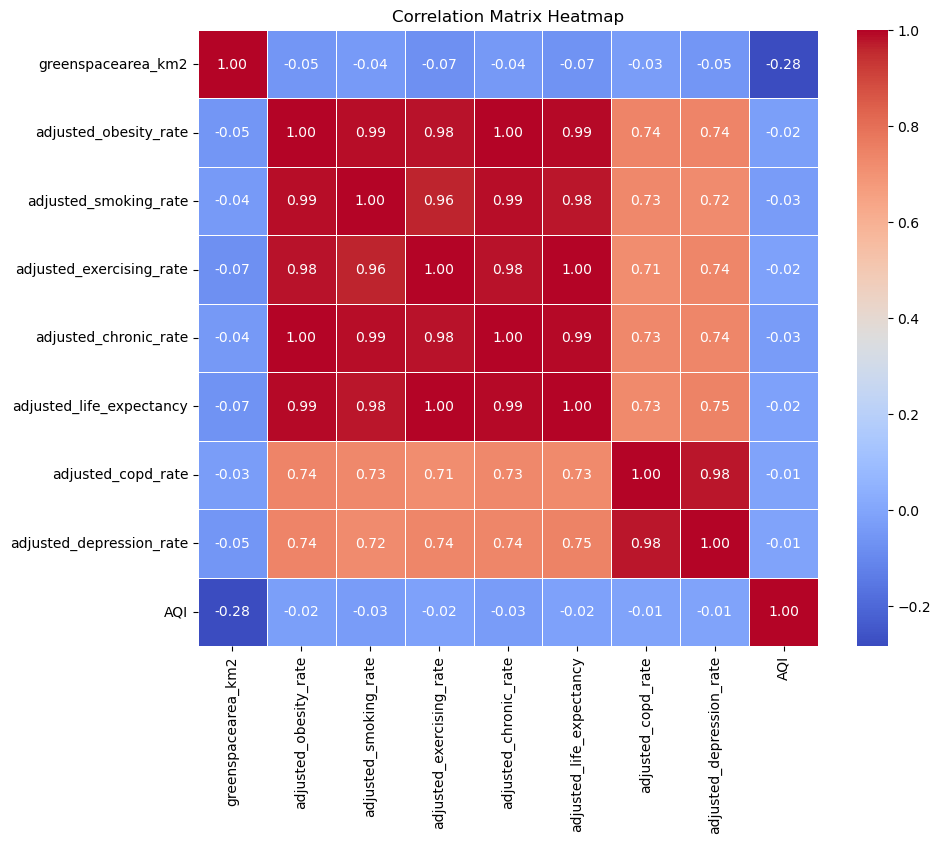

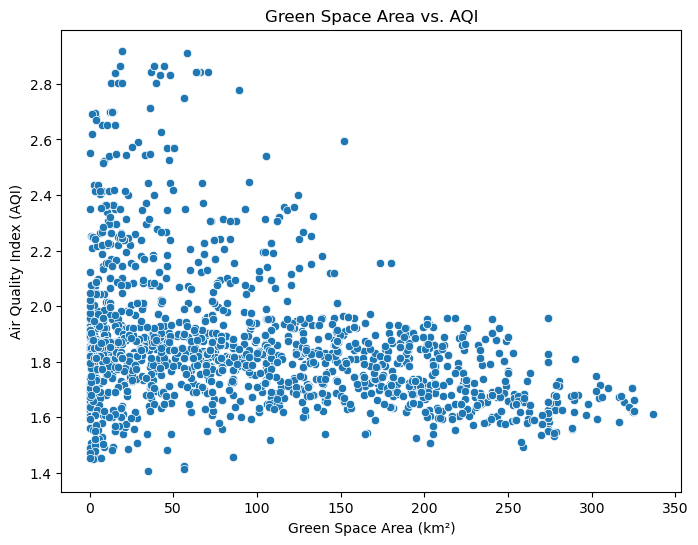

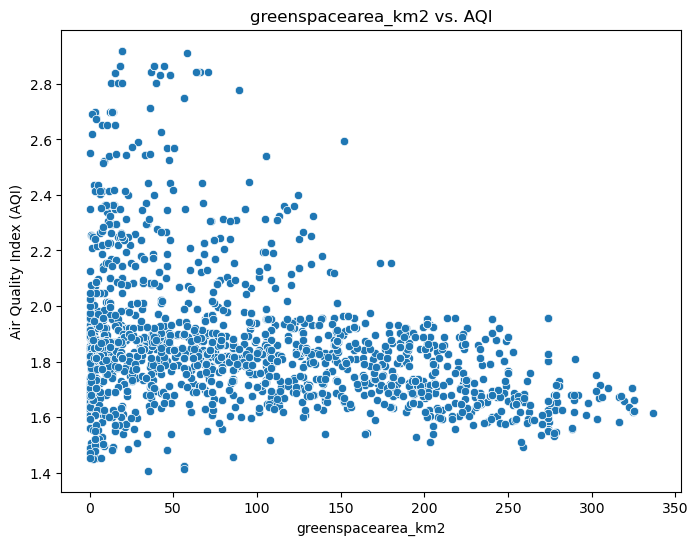

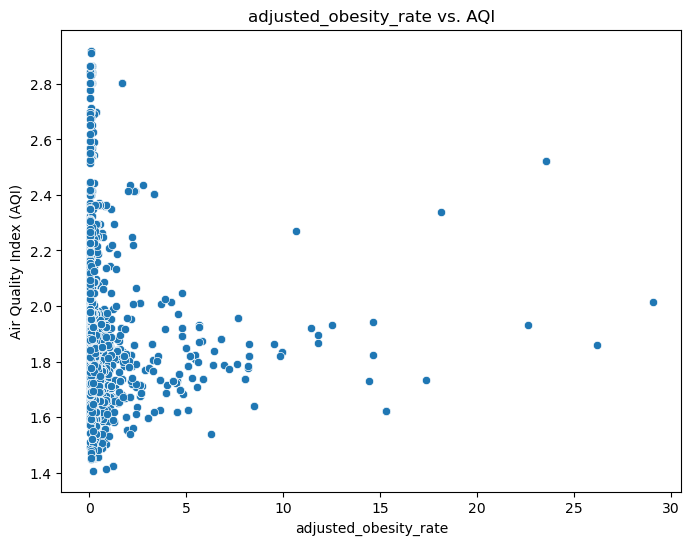

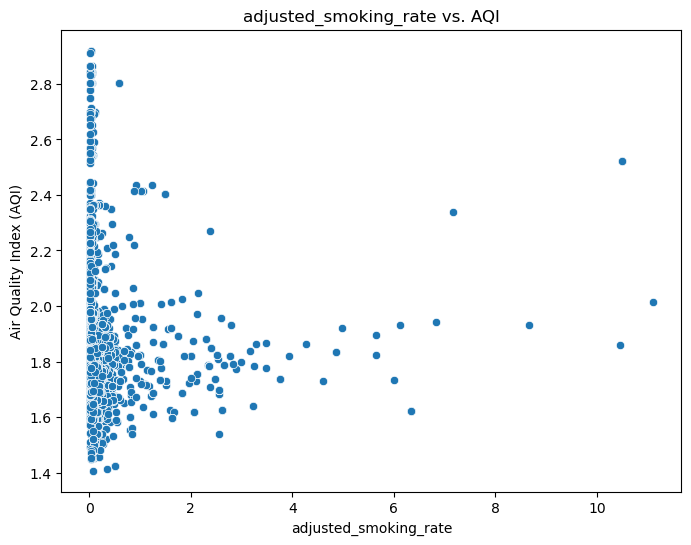

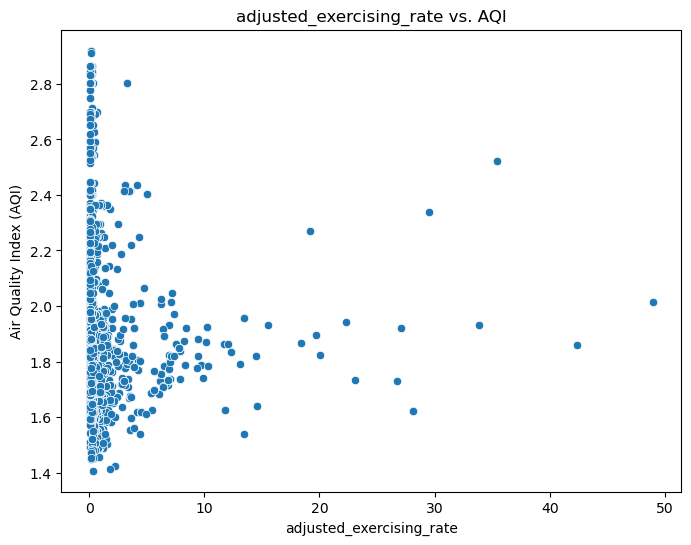

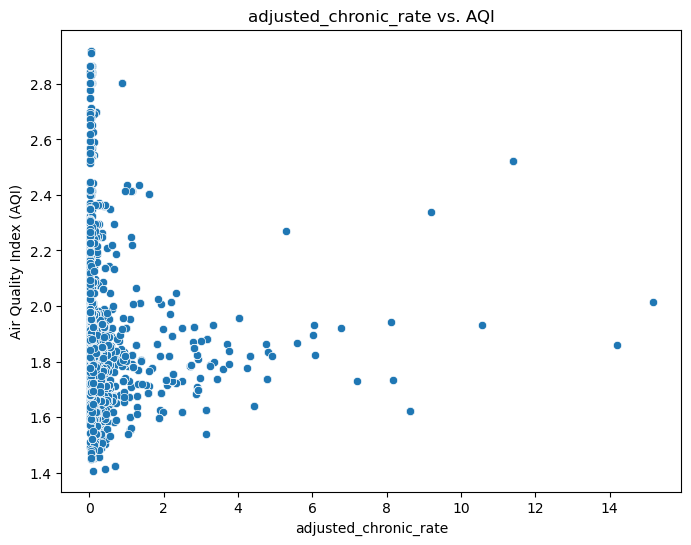

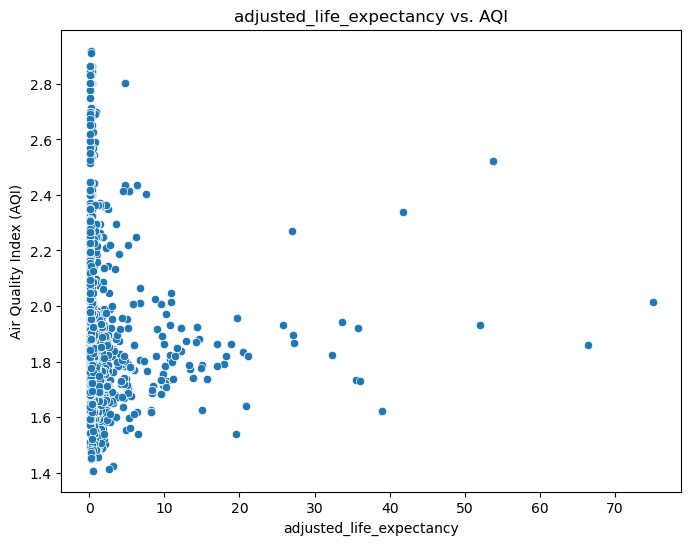

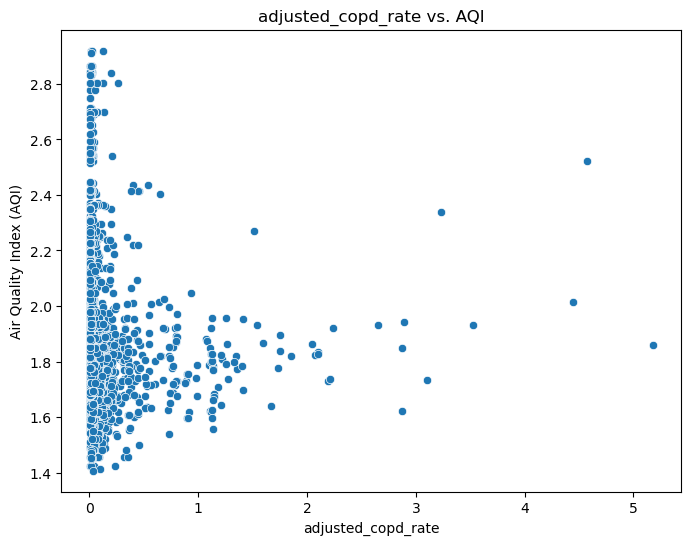

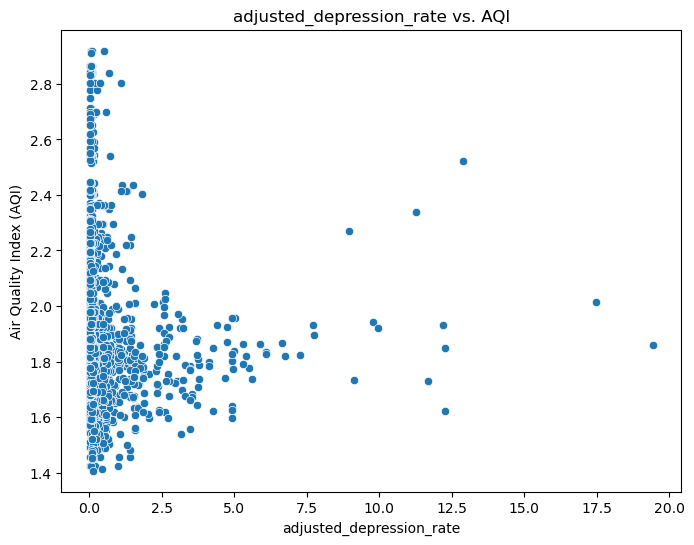

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df 

# Filter out the first 300 rows with non-null AQI values
df_non_null = df[df['AQI'].notnull()].head(3000)

# Select relevant columns for correlation analysis
relevant_columns = [
    'greenspacearea_km2', 
    'adjusted_obesity_rate', 
    'adjusted_smoking_rate', 
    'adjusted_exercising_rate', 
    'adjusted_chronic_rate', 
    'adjusted_life_expectancy', 
    'adjusted_copd_rate',
    'adjusted_depression_rate',
    'AQI'
]

# Create a DataFrame with only the relevant columns
df_corr = df_non_null[relevant_columns]

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Visualize the correlation between green space area and AQI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='greenspacearea_km2', y='AQI', data=df_non_null)
plt.title('Green Space Area vs. AQI')
plt.xlabel('Green Space Area (km²)')
plt.ylabel('Air Quality Index (AQI)')
plt.show()

# Optionally, plot scatter plots for other variables against AQI
for col in relevant_columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='AQI', data=df_non_null)
    plt.title(f'{col} vs. AQI')
    plt.xlabel(col)
    plt.ylabel('Air Quality Index (AQI)')
    plt.show()